# Predicting Survivals in Titanic Usecase

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

In [147]:
# to avoid warning messages
import warnings
warnings.simplefilter('ignore')

# Importing the Libraries

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# Loading the Dataset

In [149]:
df = pd.read_csv('titanic_train.csv')
df.head() # disply first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Data Exploration/Analysis)

In [150]:
# Statistical Summary of the numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the statistical Summary, we can see that column "Age" has missing values.

In [151]:
# checking the missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation on the missing data:

1. The Embarked feature has only 2 missing values.
2. The Age feature has 177 missing values.
3. The Cabin feature has 687 missing values. It seems we should drop the Cabin feature since it has 687 missing data out of total 891 data.

In [152]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The total number of the columns is 12. Since our objective here is to find if the passenger survived the disaster, column 'Survived' is our target variable and the rest 11 are features.

# Visualization

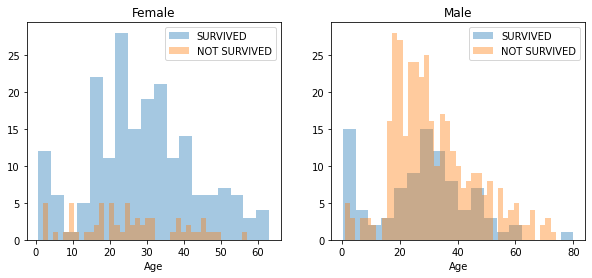

In [153]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

# separting women and men
female = df[df['Sex']=='female']
male = df[df['Sex']=='male']

# Male survival as per Age group
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), 
                  bins=18, label = 'SURVIVED', ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), 
                  bins=40, label = 'NOT SURVIVED', ax = axes[0], kde =False)
ax.set_title('Female')
ax.legend()

# Female Survival as per Age group
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), 
                  bins=18, label = 'SURVIVED', ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), 
                  bins=40, label = 'NOT SURVIVED', ax = axes[1], kde = False)
ax.set_title('Male')
ax.legend()
plt.show()

Few observations based on above visualization:
    
1. Women have high probability of survival in Age range 18-35
2. Men have high probability of survival in Age range 15-40
3. Children between age 0-5 have a little bit higher probability of survival.

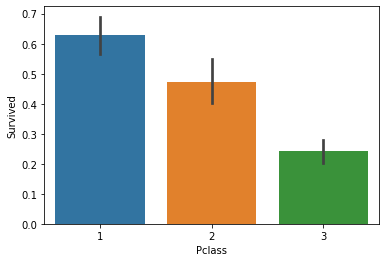

In [154]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

Here we can see that 'Pclass' defnitely plays a roles in deciding for passenger's survival

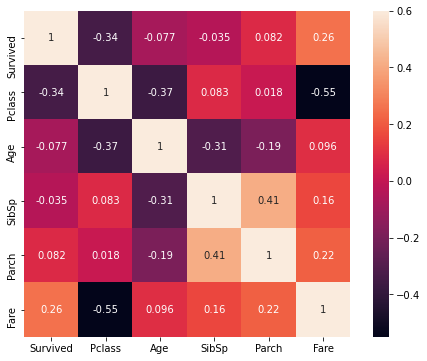

In [155]:
plt.figure(figsize=(8,6))
foo = sns.heatmap(df.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

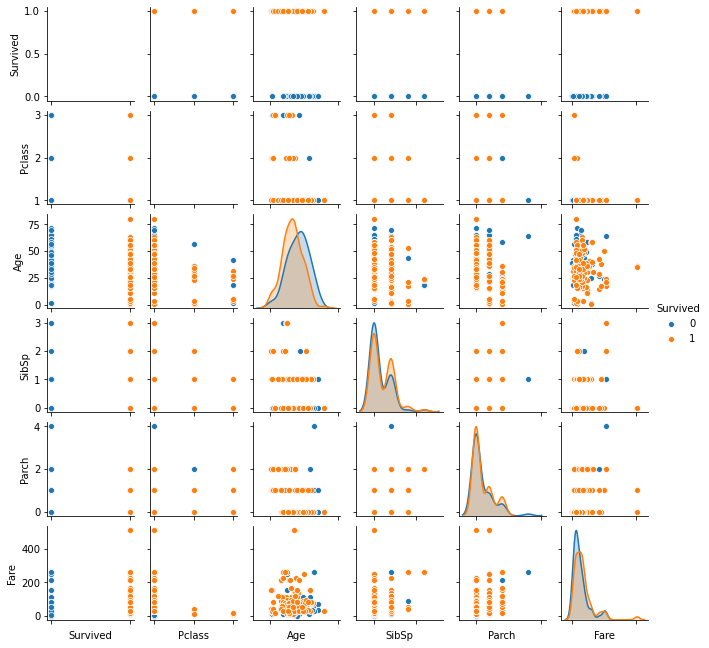

In [156]:
# pairplot between the numerical columns to see the relationship.
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
ax = sns.pairplot(data=df.dropna(), vars=cols, size=1.5,
                 hue='Survived')
ax.set(xticklabels=[])
plt.show()

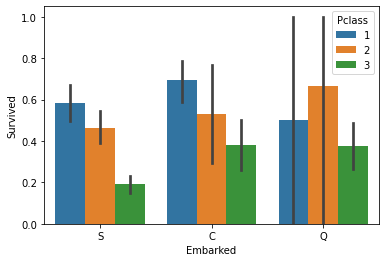

In [157]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=df)
plt.show()

# Data Preparation

Treating the missing values

As we found that the column "Cabin" has more than 70% of missing data hence it is better to drop this column.

In [158]:
df.drop('Cabin', axis=1, inplace=True)

In [159]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [160]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [161]:
df['Embarked'].fillna('S', inplace=True)

In [162]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now the Dataset does not have any missing values

In [163]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


From the above EDA we can consider to drop the columns, PassengerId, Name and Ticket

In [164]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


The 2 columns 'Age' and 'Embarked' are categorical data, we have to convert them into Numerical categorical data

In [165]:
df_gender = pd.get_dummies(df['Sex'], drop_first=True)
df_new = pd.concat([df, df_gender], axis=1)

In [166]:
df_new.drop(['Sex'], axis=1, inplace=True)
df_new.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0


In [167]:
df_embarked = pd.get_dummies(df['Embarked'], drop_first=True)
data = pd.concat([df_new, df_embarked], axis=1)

In [168]:
data.drop(['Embarked'], axis=1, inplace=True)
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


# Scaling the Age and Fare column

In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_scale = ['Age', 'Fare']
data[feature_scale] = sc.fit_transform(data[feature_scale])

In [170]:
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,-0.592481,1,0,-0.502445,1,0,1
1,1,1,0.638789,1,0,0.786845,0,0,0


# Splitting the dataset into x and y

In [171]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [175]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i
        
print(f"Best Accuracy {accu*100} found on Random state {best_rstate}")

Best Accuracy 87.89237668161435 found on Random state 150


We found the best random state at 150 and will be using it in train_test_split in next step

In [176]:
# creating train test split using the best random state which we found above
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=150)

# Finding the best Model

LogisticRegression

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

accuracyscore = accuracy_score(y_test,y_pred)
cvscore = cross_val_score(LogisticRegression(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")

Accuracy= 87.89237668161435, cross_val_score= 76.64459656604198 & difference= 11.247780115572368


RandomForestClassifier

In [184]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

accuracyscore = accuracy_score(y_test,y_pred)
cvscore = cross_val_score(LogisticRegression(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")

Accuracy= 85.65022421524664, cross_val_score= 76.64459656604198 & difference= 9.005627649204655


SGDClassifier

In [185]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)

accuracyscore = accuracy_score(y_test,y_pred)
cvscore = cross_val_score(LogisticRegression(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")

Accuracy= 77.57847533632287, cross_val_score= 76.64459656604198 & difference= 0.9338787702808844


DecisionTreeClassifier

In [186]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.predict(x_test)

accuracyscore = accuracy_score(y_test,y_pred)
cvscore = cross_val_score(LogisticRegression(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")

Accuracy= 77.57847533632287, cross_val_score= 76.64459656604198 & difference= 0.9338787702808844


KNeighborsClassifier

In [187]:
from sklearn.neighbors import KNeighborsClassifier
kn =KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)

accuracyscore = accuracy_score(y_test,y_pred)
cvscore = cross_val_score(LogisticRegression(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")

Accuracy= 87.4439461883408, cross_val_score= 76.64459656604198 & difference= 10.79934962229882


GaussianNB

In [188]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

accuracyscore = accuracy_score(y_test,y_pred)
cvscore = cross_val_score(LogisticRegression(), x_train, y_train, cv=5).mean()

print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")

Accuracy= 82.51121076233184, cross_val_score= 76.64459656604198 & difference= 5.866614196289859


LogisticRegression, RandomForestClassifier, KNeighborsClassifier and GaussianNB have performed well. But since LogisticRegression
has the highest accuracy score of 87.89, so we will go for LogisticRegression

In [191]:
# creating parameter list to pass in GridSearchCV
parameters = {"max_iter" : [500,700,900,1100,1300,1500],
              "penalty" : ["elasticnet","l1","l2"]}

In [193]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='r2') # initializing GridsearchCV
GCV.fit(x_train,y_train)
GCV.best_estimator_   # Finding best estimators
GCV_pred = GCV.best_estimator_.predict(x_test) #predicting the values using best estimators found by gridserchcv
print("Final Accuracy: ",accuracy_score(y_test,GCV_pred)*100) # final accuracy

Final Accuracy:  87.89237668161435


Model Accuracy is not increasing ter 87.89. Hence this is our final accuracy

# Serialization

In [194]:
import joblib
joblib.dump(GCV.best_estimator_,"Titanic.pkl")

['Titanic.pkl']